In [3]:
import pandas as pd
import numpy  as np
import  matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import cv2
from matplotlib.pyplot import imshow
from PIL import Image
import os
from string import digits

folder = 'C:\\Users\\dehgh\\OneDrive\\Desktop\\HW-parttern\\HW#4\\jaffe'
img_path = os.listdir(folder)
feelings = []

for i, p in enumerate(img_path):
    img_path[i] = os.path.join(folder, p)
    remove_digits = str.maketrans('', '', digits)
    feeling = p.split('.')[1].translate(remove_digits)
    feelings.append(feeling)



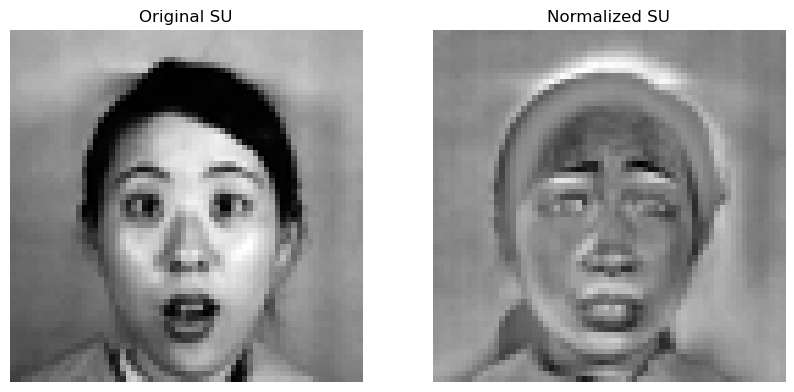

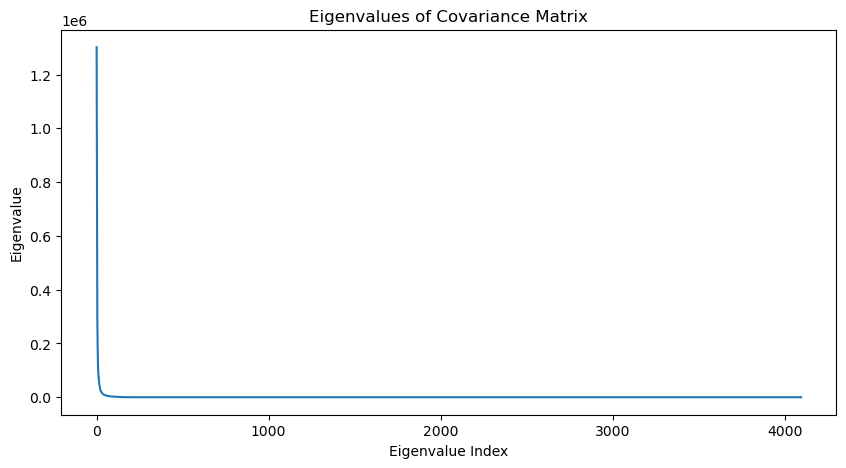

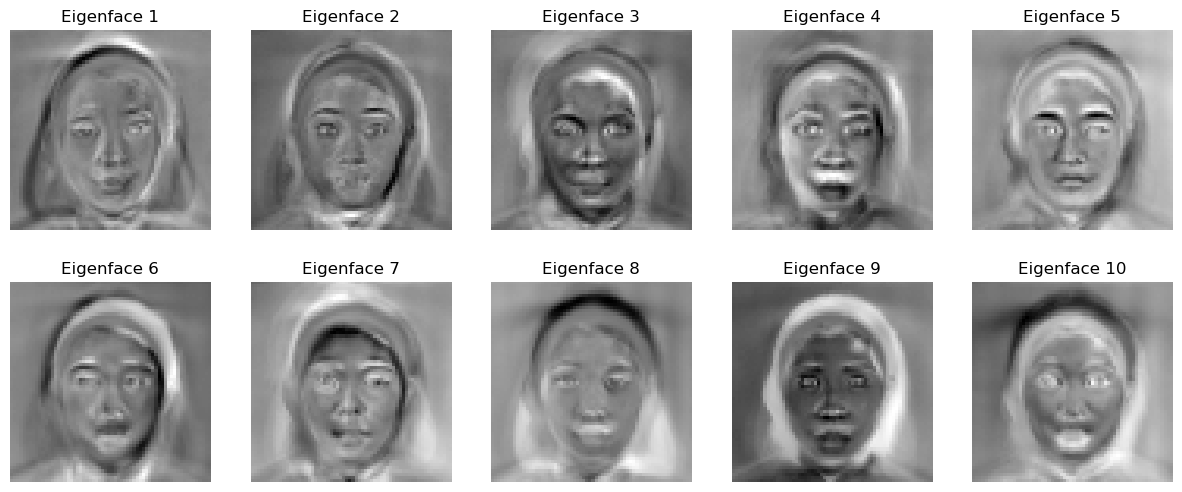

C:\Users\dehgh\anaconda3\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


AttributeError: 'AxesSubplot' object has no attribute 'set_zlabel'

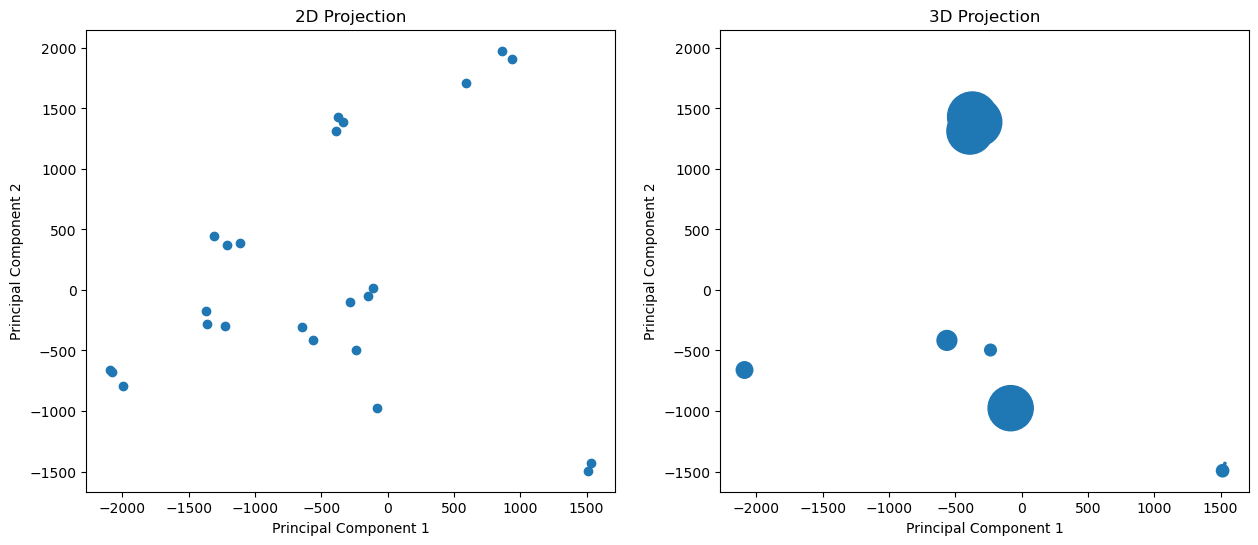

In [4]:
# Create a DataFrame with image paths and feelings
data = pd.DataFrame({'path': img_path, 'feeling': feelings})

# Resize images to 64x64 and flatten them
images = []
for i, row in data.iterrows():
    im = Image.open(row['path']).resize((64, 64))
    im = np.array(im).flatten()
    images.append(im)

images = np.array(images)

# Calculate mean face
mean_face = np.mean(images, axis=0)

# Subtract mean face from each image
normalized_images = images - mean_face

# Randomly select one image from each class for visualization
selected_images = []

for emotion in np.unique(feelings):
    subset = data[data['feeling'] == emotion]
    random_index = np.random.choice(subset.index, size=1, replace=False)
    selected_images.append(subset.loc[random_index])

selected_data = pd.concat(selected_images, ignore_index=True)

# Plot original and normalized images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, row in selected_data.iterrows():
    original_image = Image.open(row['path']).resize((64, 64))
    original_image = np.array(original_image)

    normalized_image = normalized_images[row.name].reshape((64, 64))

    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original ' + row['feeling'])
    axes[0].axis('off')

    axes[1].imshow(normalized_image, cmap='gray')
    axes[1].set_title('Normalized ' + row['feeling'])
    axes[1].axis('off')

plt.show()

# Calculate covariance matrix and perform eigen decomposition
cov_matrix = np.cov(normalized_images, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Plot eigenvalues
plt.figure(figsize=(10, 5))
plt.plot(np.flip(eigenvalues))
plt.title('Eigenvalues of Covariance Matrix')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.show()

# Select top 10 eigenfaces
top_eigenfaces = eigenvectors[:, -10:]

# Visualize top 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    eigenface = top_eigenfaces[:, i].reshape((64, 64))
    axes[i // 5, i % 5].imshow(eigenface, cmap='gray')
    axes[i // 5, i % 5].set_title(f'Eigenface {i + 1}')
    axes[i // 5, i % 5].axis('off')

plt.show()

# Project images onto a lower-dimensional subspace (2D and 3D)
pca_2d = PCA(n_components=2)
projected_2d = pca_2d.fit_transform(normalized_images)

pca_3d = PCA(n_components=3)
projected_3d = pca_3d.fit_transform(normalized_images)

# Visualize the projected data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for emotion in np.unique(feelings):
    subset_indices = data[data['feeling'] == emotion].index
    subset_2d = projected_2d[subset_indices]
    subset_3d = projected_3d[subset_indices]

    axes[0].scatter(subset_2d[:, 0], subset_2d[:, 1], label=emotion)
    axes[0].set_title('2D Projection')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')

    axes[1].scatter(subset_3d[:, 0], subset_3d[:, 1], subset_3d[:, 2], label=emotion)
    axes[1].set_title('3D Projection')
    axes[1].set_xlabel('Principal Component 1')
    axes[1].set_ylabel('Principal Component 2')
    axes[1].set_zlabel('Principal Component 3')

plt.legend()
plt.show()

# Reconstruct the projected faces
def reconstruct_faces(projected_data, eigenfaces, mean_face):
    reconstructed_faces = np.dot(projected_data, eigenfaces.T) + mean_face
    return reconstructed_faces

# Reconstruct 5 faces (one from each class)
num_faces_to_reconstruct = 5
reconstructed_faces = reconstruct_faces(projected_2d[:num_faces_to_reconstruct], top_eigenfaces, mean_face)

# Visualize original and reconstructed faces
fig, axes = plt.subplots(2, num_faces_to_reconstruct, figsize=(15, 6))

for i in range(num_faces_to_reconstruct):
    original_face = normalized_images[selected_data.index[i]].reshape((64, 64))
    reconstructed_face = reconstructed_faces[i].reshape((64, 64))

    axes[0, i].imshow(original_face, cmap='gray')
    axes[0, i].set_title(f'Original {selected_data["feeling"].iloc[i]}')
    axes[0, i].axis('off')

    axes[1, i].imshow(reconstructed_face, cmap='gray')
    axes[1, i].set_title(f'Reconstructed {selected_data["feeling"].iloc[i]}')
    axes[1, i].axis('off')

plt.show()

# Calculate the number of principal components needed to retain 90% of the cumulative variance
cumulative_variance_ratio = np.cumsum(pca_2d.explained_variance_ratio_)
num_components_90_percent_variance = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print(f'Number of principal components needed for 90% variance: {num_components_90_percent_variance}')

# Project data using the determined number of components
pca_optimal = PCA(n_components=num_components_90_percent_variance)
projected_optimal = pca_optimal.fit_transform(normalized_images)

# Visualize the projected data with optimal number of components
plt.figure(figsize=(10, 6))

for emotion in np.unique(feelings):
    subset_indices = data[data['feeling'] == emotion].index
    subset_optimal = projected_optimal[subset_indices]

    plt.scatter(subset_optimal[:, 0], subset_optimal[:, 1], label=emotion)

plt.title('Optimal 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


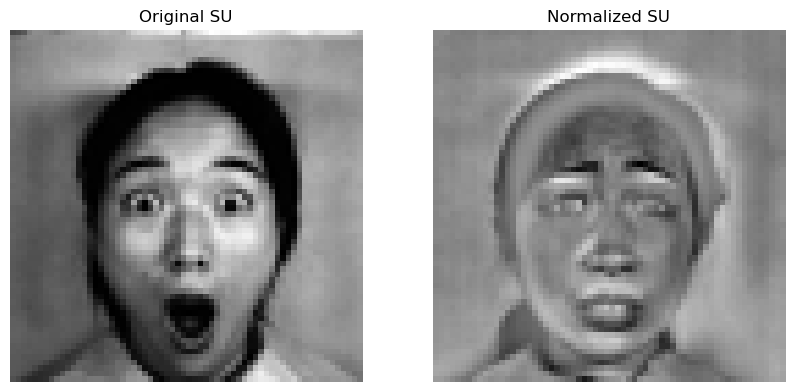

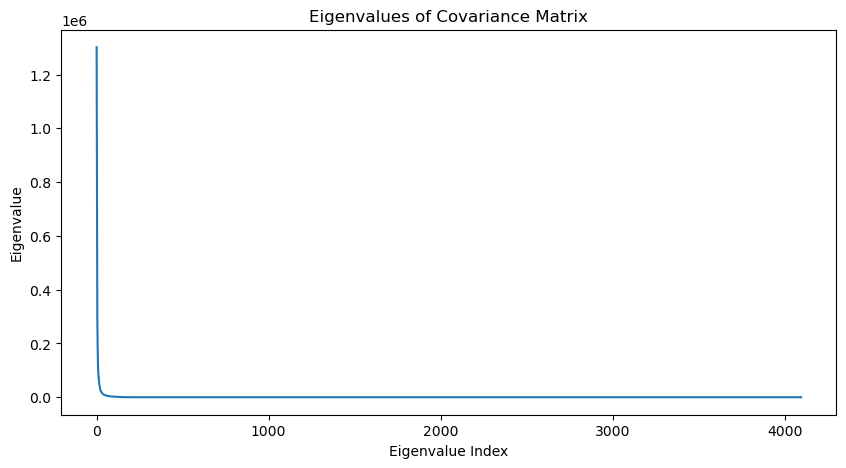

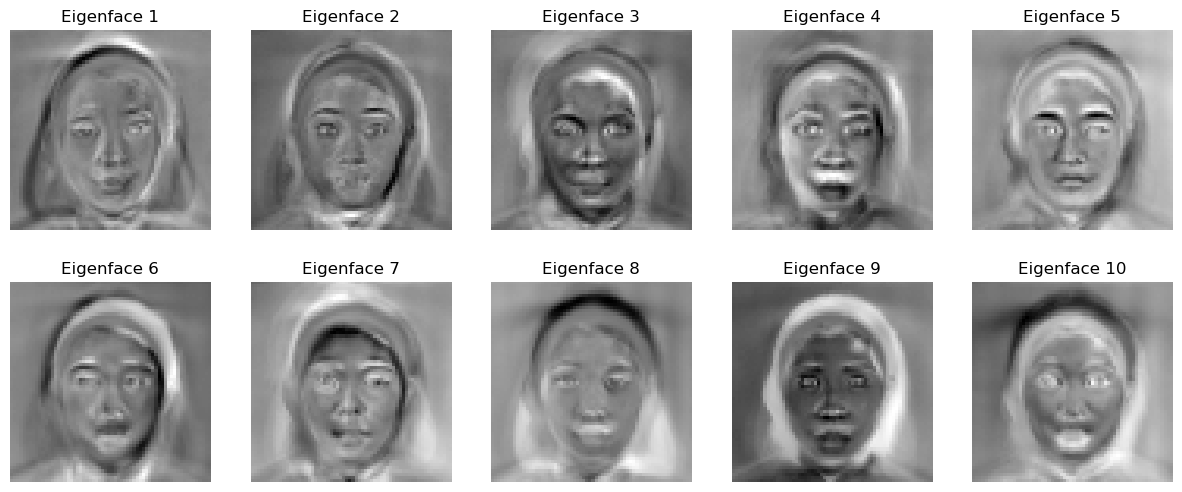

C:\Users\dehgh\anaconda3\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


AttributeError: 'AxesSubplot' object has no attribute 'set_zlabel'

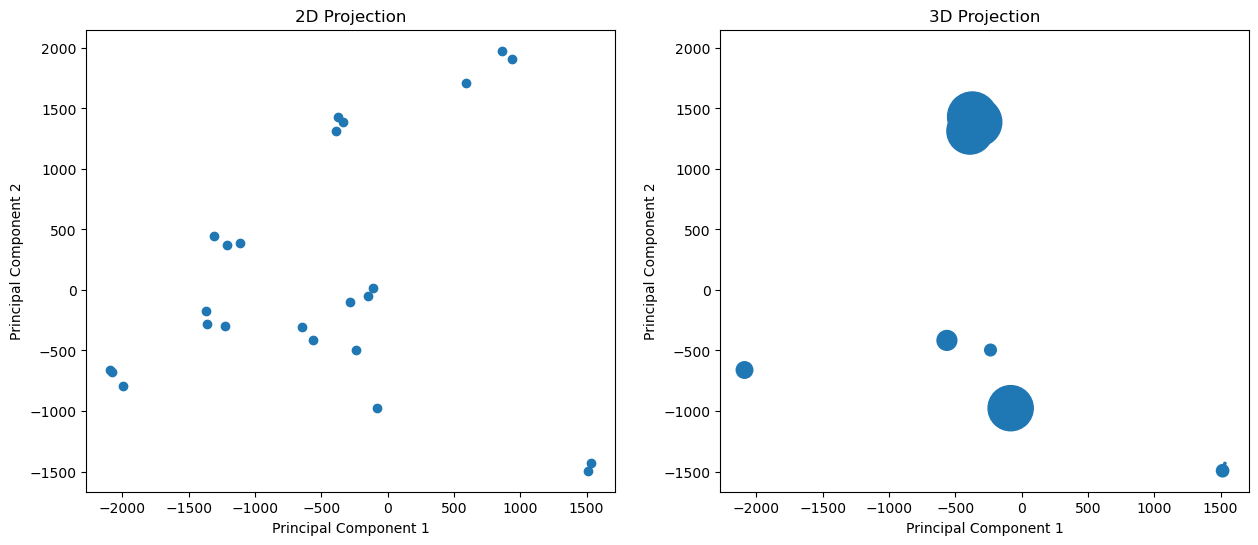

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Folder containing images
folder = 'C:\\Users\\dehgh\\OneDrive\\Desktop\\HW-parttern\\HW#4\\jaffe'

# List all image files in the folder
img_path = os.listdir(folder)

# Extract feelings from image filenames
feelings = []
for i, p in enumerate(img_path):
    img_path[i] = os.path.join(folder, p)
    remove_digits = str.maketrans('', '', digits)
    feeling = p.split('.')[1].translate(remove_digits)
    feelings.append(feeling)

# Create a DataFrame with image paths and feelings
data = pd.DataFrame({'path': img_path, 'feeling': feelings})

# Resize images to 64x64 and flatten them
images = []
for i, row in data.iterrows():
    im = Image.open(row['path']).resize((64, 64))
    im = np.array(im).flatten()
    images.append(im)

images = np.array(images)

# Calculate mean face
mean_face = np.mean(images, axis=0)

# Subtract mean face from each image
normalized_images = images - mean_face

# Randomly select one image from each class for visualization
selected_images = []

for emotion in np.unique(feelings):
    subset = data[data['feeling'] == emotion]
    random_index = np.random.choice(subset.index, size=1, replace=False)
    selected_images.append(subset.loc[random_index])

selected_data = pd.concat(selected_images, ignore_index=True)

# Plot original and normalized images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, row in selected_data.iterrows():
    original_image = Image.open(row['path']).resize((64, 64))
    original_image = np.array(original_image)

    normalized_image = normalized_images[row.name].reshape((64, 64))

    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original ' + row['feeling'])
    axes[0].axis('off')

    axes[1].imshow(normalized_image, cmap='gray')
    axes[1].set_title('Normalized ' + row['feeling'])
    axes[1].axis('off')

plt.show()

# Calculate covariance matrix and perform eigen decomposition
cov_matrix = np.cov(normalized_images, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Plot eigenvalues
plt.figure(figsize=(10, 5))
plt.plot(np.flip(eigenvalues))
plt.title('Eigenvalues of Covariance Matrix')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.show()

# Select top 10 eigenfaces
top_eigenfaces = eigenvectors[:, -10:]

# Visualize top 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    eigenface = top_eigenfaces[:, i].reshape((64, 64))
    axes[i // 5, i % 5].imshow(eigenface, cmap='gray')
    axes[i // 5, i % 5].set_title(f'Eigenface {i + 1}')
    axes[i // 5, i % 5].axis('off')

plt.show()

# Project images onto a lower-dimensional subspace (2D and 3D)
pca_2d = PCA(n_components=2)
projected_2d = pca_2d.fit_transform(normalized_images)

pca_3d = PCA(n_components=3)
projected_3d = pca_3d.fit_transform(normalized_images)

# Visualize the projected data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for emotion in np.unique(feelings):
    subset_indices = data[data['feeling'] == emotion].index
    subset_2d = projected_2d[subset_indices]
    subset_3d = projected_3d[subset_indices]

    axes[0].scatter(subset_2d[:, 0], subset_2d[:, 1], label=emotion)
    axes[0].set_title('2D Projection')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')

    axes[1].scatter(subset_3d[:, 0], subset_3d[:, 1], subset_3d[:, 2], label=emotion)
    axes[1].set_title('3D Projection')
    axes[1].set_xlabel('Principal Component 1')
    axes[1].set_ylabel('Principal Component 2')
    axes[1].set_zlabel('Principal Component 3')  # Corrected line

plt.legend()
plt.show()

# Reconstruct the projected faces
def reconstruct_faces(projected_data, eigenfaces, mean_face):
    reconstructed_faces = np.dot(projected_data, eigenfaces.T) + mean_face
    return reconstructed_faces

# Reconstruct 5 faces (one from each class)
num_faces_to_reconstruct = 5
reconstructed_faces = reconstruct_faces(projected_2d[:num_faces_to_reconstruct], top_eigenfaces, mean_face)

# Visualize original and reconstructed faces
fig, axes = plt.subplots(2, num_faces_to_reconstruct, figsize=(15, 6))

for i in range(num_faces_to_reconstruct):
    original_face = normalized_images[selected_data.index[i]].reshape((64, 64))
    reconstructed_face = reconstructed_faces[i].reshape((64, 64))

    axes[0, i].imshow(original_face, cmap='gray')
    axes[0, i].set_title(f'Original {selected_data["feeling"].iloc[i]}')
    axes[0, i].axis('off')

    axes[1, i].imshow(reconstructed_face, cmap='gray')
    axes[1, i].set_title(f'Reconstructed {selected_data["feeling"].iloc[i]}')
    axes[1, i].axis('off')

plt.show()

# Calculate the number of principal components needed to retain 90% of the cumulative variance
cumulative_variance_ratio = np.cumsum(pca_2d.explained_variance_ratio_)
num_components_90_percent_variance = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print(f'Number of principal components needed for 90% variance: {num_components_90_percent_variance}')

# Project data using the determined number of components
pca_optimal = PCA(n_components=num_components_90_percent_variance)
projected_optimal = pca_optimal.fit_transform(normalized_images)

# Visualize the projected data with optimal number of components
plt.figure(figsize=(10, 6))

for emotion in np.unique(feelings):
    subset_indices = data[data['feeling'] == emotion].index
    subset_optimal = projected_optimal[subset_indices]

    plt.scatter(subset_optimal[:, 0], subset_optimal[:, 1], label=emotion)

plt.title('Optimal 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

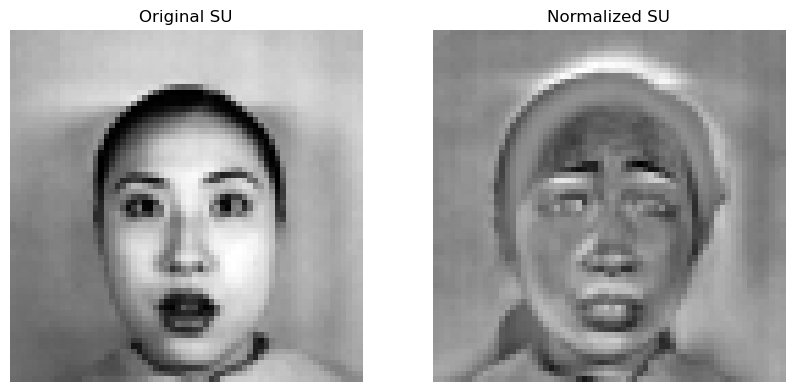

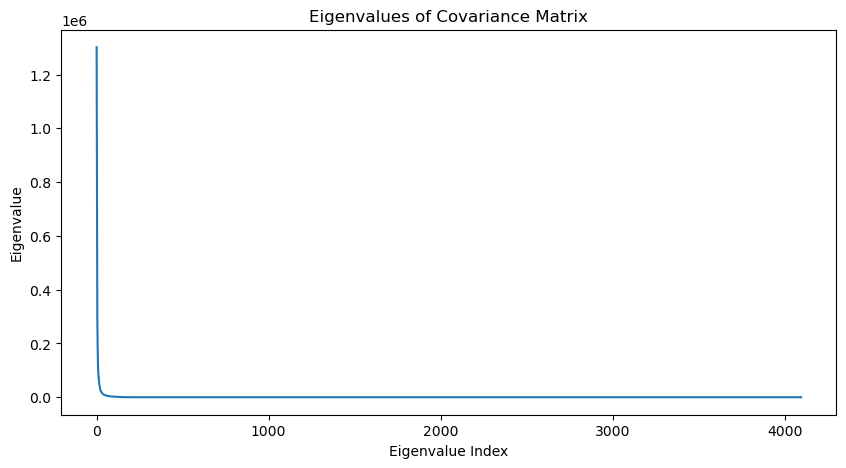

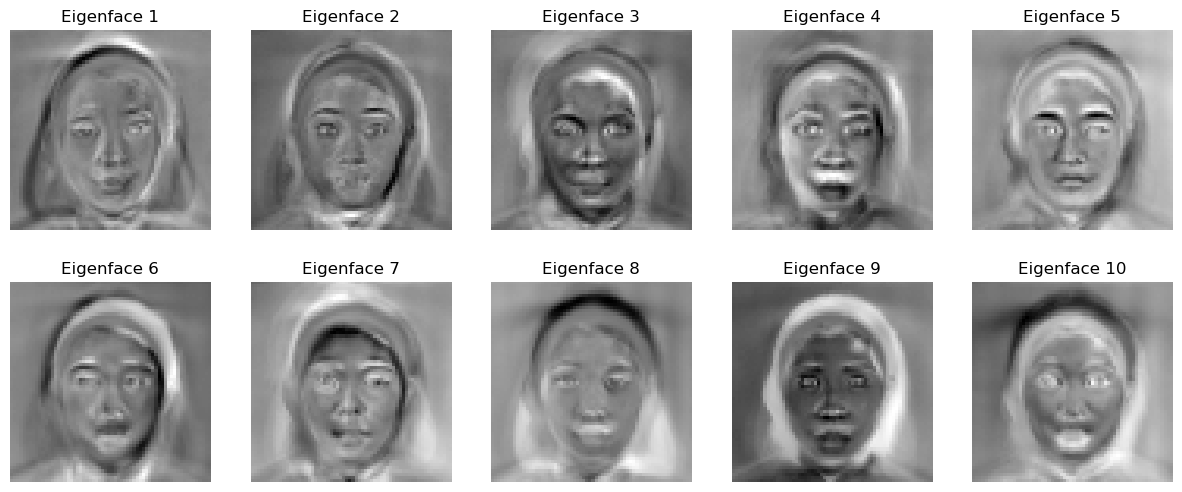

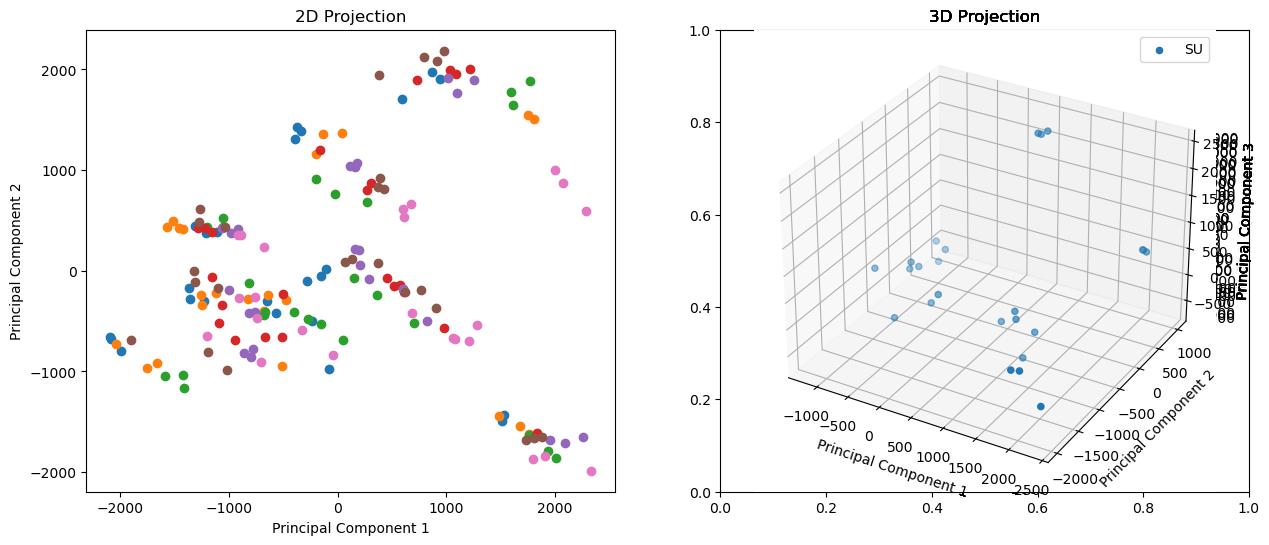

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Folder containing images
folder = 'C:\\Users\\dehgh\\OneDrive\\Desktop\\HW-parttern\\HW#4\\jaffe'

# List all image files in the folder
img_path = os.listdir(folder)

# Extract feelings from image filenames
feelings = []
for i, p in enumerate(img_path):
    img_path[i] = os.path.join(folder, p)
    remove_digits = str.maketrans('', '', digits)
    feeling = p.split('.')[1].translate(remove_digits)
    feelings.append(feeling)

# Create a DataFrame with image paths and feelings
data = pd.DataFrame({'path': img_path, 'feeling': feelings})

# Resize images to 64x64 and flatten them
images = []
for i, row in data.iterrows():
    im = Image.open(row['path']).resize((64, 64))
    im = np.array(im).flatten()
    images.append(im)

images = np.array(images)

# Calculate mean face
mean_face = np.mean(images, axis=0)

# Subtract mean face from each image
normalized_images = images - mean_face

# Randomly select one image from each class for visualization
selected_images = []

for emotion in np.unique(feelings):
    subset = data[data['feeling'] == emotion]
    random_index = np.random.choice(subset.index, size=1, replace=False)
    selected_images.append(subset.loc[random_index])

selected_data = pd.concat(selected_images, ignore_index=True)

# Plot original and normalized images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, row in selected_data.iterrows():
    original_image = Image.open(row['path']).resize((64, 64))
    original_image = np.array(original_image)

    normalized_image = normalized_images[row.name].reshape((64, 64))

    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original ' + row['feeling'])
    axes[0].axis('off')

    axes[1].imshow(normalized_image, cmap='gray')
    axes[1].set_title('Normalized ' + row['feeling'])
    axes[1].axis('off')

plt.show()

# Calculate covariance matrix and perform eigen decomposition
cov_matrix = np.cov(normalized_images, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Plot eigenvalues
plt.figure(figsize=(10, 5))
plt.plot(np.flip(eigenvalues))
plt.title('Eigenvalues of Covariance Matrix')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.show()

# Select top 10 eigenfaces
top_eigenfaces = eigenvectors[:, -10:]

# Visualize top 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    eigenface = top_eigenfaces[:, i].reshape((64, 64))
    axes[i // 5, i % 5].imshow(eigenface, cmap='gray')
    axes[i // 5, i % 5].set_title(f'Eigenface {i + 1}')
    axes[i // 5, i % 5].axis('off')

plt.show()

# Project images onto a lower-dimensional subspace (2D and 3D)
pca_2d = PCA(n_components=2)
projected_2d = pca_2d.fit_transform(normalized_images)

pca_3d = PCA(n_components=3)
projected_3d = pca_3d.fit_transform(normalized_images)

# Visualize the projected data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for emotion in np.unique(feelings):
    subset_indices = data[data['feeling'] == emotion].index
    subset_2d = projected_2d[subset_indices]
    subset_3d = projected_3d[subset_indices]

    axes[0].scatter(subset_2d[:, 0], subset_2d[:, 1], label=emotion)
    axes[0].set_title('2D Projection')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')

    # Create a 3D subplot
    ax_3d = fig.add_subplot(122, projection='3d')
    ax_3d.scatter(subset_3d[:, 0], subset_3d[:, 1], subset_3d[:, 2], label=emotion)
    ax_3d.set_title('3D Projection')
    ax_3d.set_xlabel('Principal Component 1')
    ax_3d.set_ylabel('Principal Component 2')
    ax_3d.set_zlabel('Principal Component 3')

plt.legend()
plt.show()

# The rest of the code remains unchanged.


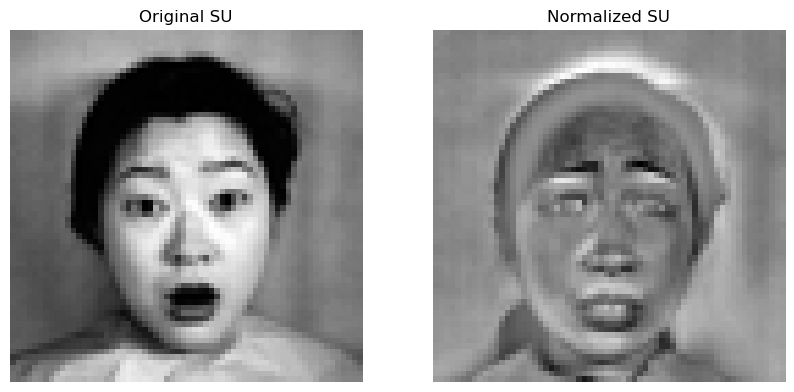

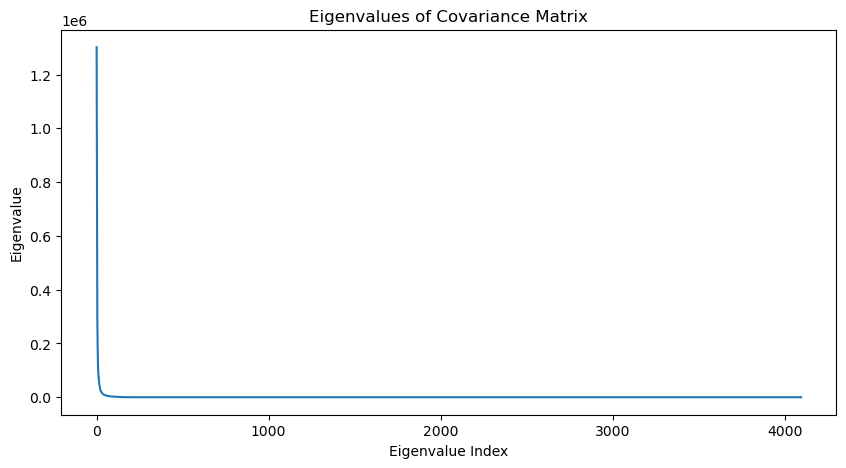

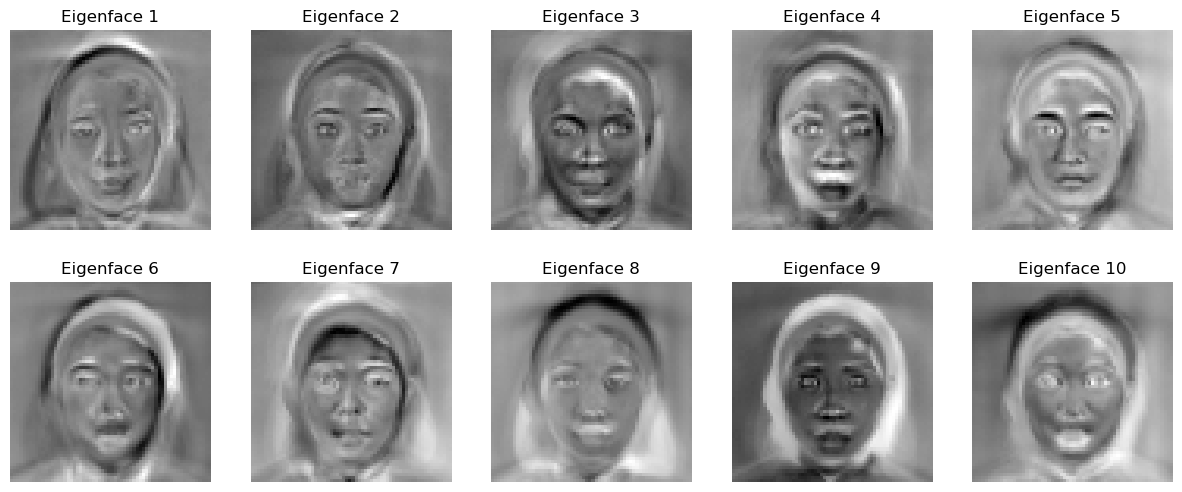

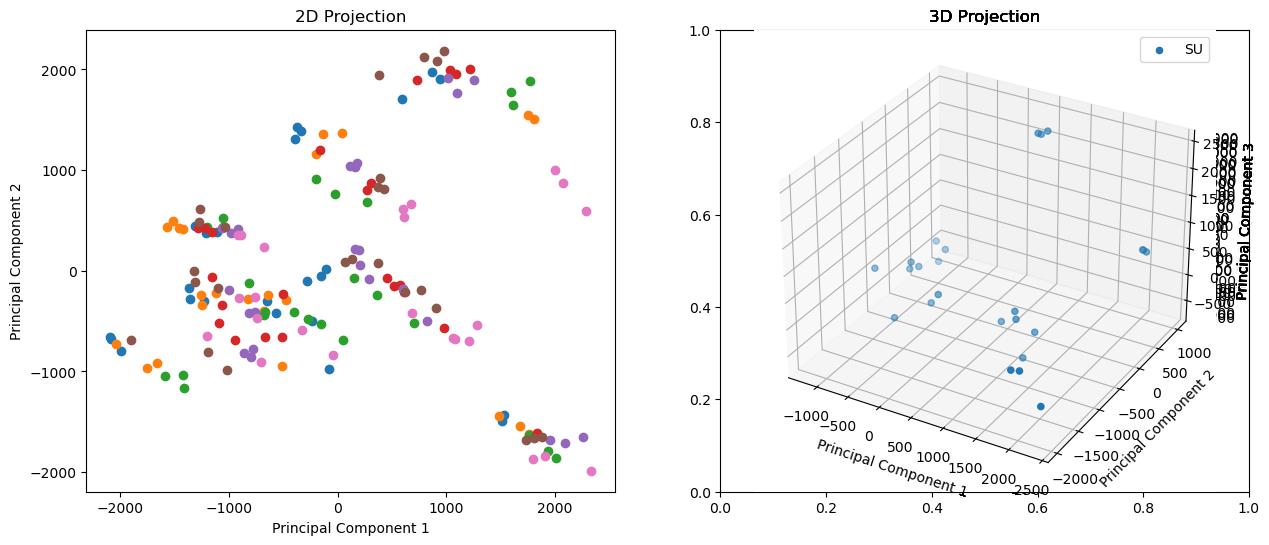

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from string import digits

# Folder containing images
folder = 'C:\\Users\\dehgh\\OneDrive\\Desktop\\HW-parttern\\HW#4\\jaffe'

# List all image files in the folder
img_path = os.listdir(folder)

# Extract feelings from image filenames
feelings = []
for i, p in enumerate(img_path):
    img_path[i] = os.path.join(folder, p)
    remove_digits = str.maketrans('', '', digits)
    feeling = p.split('.')[1].translate(remove_digits)
    feelings.append(feeling)

# Create a DataFrame with image paths and feelings
data = pd.DataFrame({'path': img_path, 'feeling': feelings})

# Resize images to 64x64 and flatten them
images = []
for i, row in data.iterrows():
    im = Image.open(row['path']).resize((64, 64))
    im = np.array(im).flatten()
    images.append(im)

images = np.array(images)

# Calculate mean face
mean_face = np.mean(images, axis=0)

# Subtract mean face from each image
normalized_images = images - mean_face

# Randomly select one image from each class for visualization
selected_images = []

for emotion in np.unique(feelings):
    subset = data[data['feeling'] == emotion]
    random_index = np.random.choice(subset.index, size=1, replace=False)
    selected_images.append(subset.loc[random_index])

selected_data = pd.concat(selected_images, ignore_index=True)

# Plot original and normalized images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, row in selected_data.iterrows():
    original_image = Image.open(row['path']).resize((64, 64))
    original_image = np.array(original_image)

    normalized_image = normalized_images[row.name].reshape((64, 64))

    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original ' + row['feeling'])
    axes[0].axis('off')

    axes[1].imshow(normalized_image, cmap='gray')
    axes[1].set_title('Normalized ' + row['feeling'])
    axes[1].axis('off')

plt.show()

# Calculate covariance matrix and perform eigen decomposition
cov_matrix = np.cov(normalized_images, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Plot eigenvalues
plt.figure(figsize=(10, 5))
plt.plot(np.flip(eigenvalues))
plt.title('Eigenvalues of Covariance Matrix')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.show()

# Select top 10 eigenfaces
top_eigenfaces = eigenvectors[:, -10:]

# Visualize top 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    eigenface = top_eigenfaces[:, i].reshape((64, 64))
    axes[i // 5, i % 5].imshow(eigenface, cmap='gray')
    axes[i // 5, i % 5].set_title(f'Eigenface {i + 1}')
    axes[i // 5, i % 5].axis('off')

plt.show()



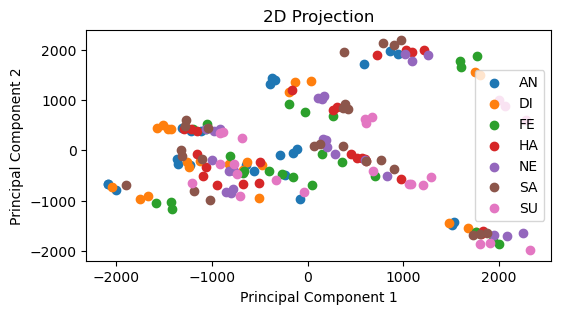

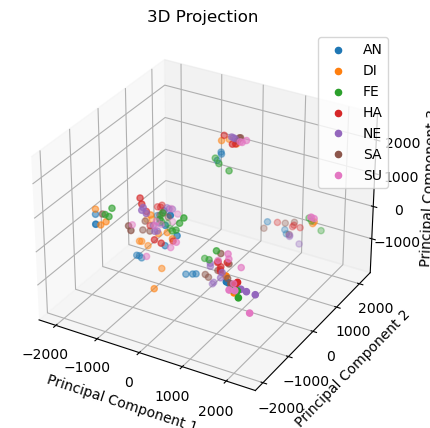

In [8]:
# Visualize the 2D projected data with class labels
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6, 3))
for emotion in np.unique(feelings):
    subset_indices = data[data['feeling'] == emotion].index
    subset_2d = projected_2d[subset_indices]

    plt.scatter(subset_2d[:, 0], subset_2d[:, 1], label=emotion)

plt.title('2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize the 3D projected data with class labels
fig_3d = plt.figure(figsize=(8, 5))
ax_3d = fig_3d.add_subplot(111, projection='3d')

for emotion in np.unique(feelings):
    subset_indices = data[data['feeling'] == emotion].index
    subset_3d = projected_3d[subset_indices]

    ax_3d.scatter(subset_3d[:, 0], subset_3d[:, 1], subset_3d[:, 2], label=emotion)

ax_3d.set_title('3D Projection')
ax_3d.set_xlabel('Principal Component 1')
ax_3d.set_ylabel('Principal Component 2')
ax_3d.set_zlabel('Principal Component 3')
ax_3d.legend()
plt.show()


In [6]:
# Randomly select one image from each class for visualization
selected_images = []

for emotion in np.unique(feelings):
    subset = data[data['feeling'] == emotion]
    random_index = np.random.choice(subset.index, size=1, replace=False)
    selected_images.append(subset.loc[random_index])

selected_data = pd.concat(selected_images, ignore_index=True)

# Reconstruct faces from 2D projection (assuming you have already computed this)
reconstructed_selected_2d = reconstruct_faces(np.dot(selected_data['2D_projection'], top_eigenfaces[:, -2:]), top_eigenfaces[:, -2:], mean_face)

# Reconstruct faces from 3D projection (assuming you have already computed this)
reconstructed_selected_3d = reconstruct_faces(np.dot(selected_data['3D_projection'], top_eigenfaces[:, -3:]), top_eigenfaces[:, -3:], mean_face)

# Visualize the original and reconstructed faces
fig, axes = plt.subplots(2, len(selected_data), figsize=(15, 6))

for i, row in selected_data.iterrows():
    original_image = Image.open(row['path']).resize((64, 64))
    original_image = np.array(original_image)

    reconstructed_image_2d = reconstructed_selected_2d[i].reshape((64, 64))
    reconstructed_image_3d = reconstructed_selected_3d[i].reshape((64, 64))

    axes[0, i].imshow(original_image, cmap='gray')
    axes[0, i].set_title('Original ' + row['feeling'])
    axes[0, i].axis('off')

    axes[1, i].imshow(reconstructed_image_2d, cmap='gray')
    axes[1, i].set_title('Reconstructed 2D ' + row['feeling'])
    axes[1, i].axis('off')

plt.show()


NameError: name 'reconstruct_faces' is not defined